## Descriptive Statistics

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\sanji\Downloads\archive\customer_data.csv")

In [3]:
#Descriptive Statistics for continuous variable

descriptive_stats = data[['age', 'income', 'purchase_amount', 'satisfaction_score']].describe()

In [4]:
# Mode for categorical variables

mode_values = data[['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category']].mode()

In [5]:
# Checking for null values
null_values = data.isnull().sum()

In [6]:
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
                  age         income  purchase_amount  satisfaction_score
count  100000.000000  100000.000000    100000.000000       100000.000000
mean       30.003260   27516.269880      9634.790840            5.009650
std         4.480535   12996.782587      4799.339449            1.038714
min        12.000000    5000.000000      1118.000000            0.000000
25%        27.000000   16271.750000      5583.000000            4.000000
50%        30.000000   27584.500000      9452.000000            5.000000
75%        33.000000   38747.250000     13350.000000            6.000000
max        49.000000   50000.000000     26204.000000           10.000000


In [7]:
print("\nMode of Categorical Variables:\n", mode_values)


Mode of Categorical Variables:
    gender education region loyalty_status purchase_frequency product_category
0  Female   College   East        Regular               rare      Electronics


In [8]:
print("\nNull Values in Dataset:\n", null_values)


Null Values in Dataset:
 id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64


## Correlation Analysis (Pearson and Spearman) 

In [9]:
# Pearson correlation
pearson_corr = data[['age', 'income', 'purchase_amount', 'satisfaction_score']].corr(method='pearson')

In [11]:
# Spearman correlation
spearman_corr = data[['age', 'income', 'purchase_amount', 'satisfaction_score']].corr(method='spearman')

In [12]:
print("Pearson Correlation:\n", pearson_corr)

Pearson Correlation:
                          age    income  purchase_amount  satisfaction_score
age                 1.000000 -0.002365        -0.002089            0.000977
income             -0.002365  1.000000         0.948441            0.002780
purchase_amount    -0.002089  0.948441         1.000000            0.003424
satisfaction_score  0.000977  0.002780         0.003424            1.000000


In [13]:
print("\nSpearman Correlation:\n", spearman_corr)


Spearman Correlation:
                          age    income  purchase_amount  satisfaction_score
age                 1.000000 -0.001554        -0.001402            0.000981
income             -0.001554  1.000000         0.957127            0.002483
purchase_amount    -0.001402  0.957127         1.000000            0.003473
satisfaction_score  0.000981  0.002483         0.003473            1.000000


##  T-Test for Purchase Amounts Between Males and Females 

In [18]:
from scipy import stats

# Separating purchase amounts by gender

purchase_male = data[data['gender'] == 'Male']['purchase_amount']

purchase_female = data[data['gender'] == 'Female']['purchase_amount']

In [19]:
# Performing a two-sample t-test

t_stat, p_value = stats.ttest_ind(purchase_male, purchase_female)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.025486783414761002, P-value: 0.9796667412276578


## Chi-Square Test (Gender vs. Loyalty Status) 

In [20]:
# Creating a contingency table

contingency_table = pd.crosstab(data['gender'], data['loyalty_status'])

In [21]:
# Performing chi-square test

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_val}")


Chi-Square Statistic: 3.7564600876982195, P-value: 0.15286042270713818


##  Z-Score for Outlier Detection (Purchase Amount) 

In [22]:
from scipy.stats import zscore

# Calculating Z-scores for purchase amounts

data['purchase_amount_zscore'] = zscore(data['purchase_amount'])

In [23]:
# Marking outliers (z-score > 3 or < -3)

outliers = data[(data['purchase_amount_zscore'] > 3) | (data['purchase_amount_zscore'] < -3)]

print("Outliers Detected:\n", outliers[['id', 'purchase_amount', 'purchase_amount_zscore']])

Outliers Detected:
           id  purchase_amount  purchase_amount_zscore
1318    1319            24147                3.023808
18541  18542            24050                3.003597
27084  27085            24314                3.058605
39384  39385            24751                3.149659
44991  44992            24217                3.038394
72791  72792            25406                3.286137
73920  73921            24967                3.194666
83255  83256            24408                3.078191
91489  91490            26204                3.452411
92416  92417            24313                3.058396


##  Simple Linear Regression (Predict Purchase Amount from Income)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [25]:
# Preparing the data

X = data[['income']]
y = data['purchase_amount']

In [28]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R-squared
y_pred = model.predict(X_test)
r_squared = model.score(X_test, y_test)


R-squared: 0.8980430941778186


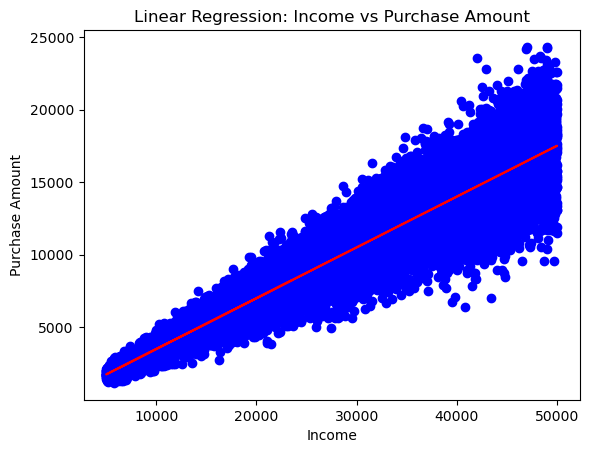

In [29]:


print(f"R-squared: {r_squared}")

# Plot regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel("Income")
plt.ylabel("Purchase Amount")
plt.title("Linear Regression: Income vs Purchase Amount")
plt.show()
